In [ ]:
# This reads in FITS images of simulated LMIR, NOMIC, and Phasecam readouts and FFTs
# so as to make a cartoon for SPIE 2019 article

# Created 2019 July 31 by E.S.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import ndimage
from scipy.ndimage import rotate, map_coordinates
from astropy.io import fits
from matplotlib.colors import LogNorm

%matplotlib inline

In [56]:
def rot(im, angle, axis, order=3, pivot=False):
    '''rotate an image clockwise by angle [degrees] about axis.
    if pivot is true the image will pivot about the axis. otherwise
    the axis will be centered in the output image''' 
    angle*=np.pi/180.#convert to radians
    y,x = np.indices(im.shape)

    # calculate how the axis moves when pivoting from bottom left corner
    theta_axis = np.arctan2(axis[1],axis[0])
    r_axis = np.abs(axis[0]+1j*axis[1])
    yoffset = r_axis*np.sin(theta_axis) - r_axis*np.sin(theta_axis-angle)
    xoffset = r_axis*np.cos(theta_axis) - r_axis*np.cos(theta_axis-angle)

    # put the axis in the middle? 
    ycenter_offset = (1-pivot) * ((im.shape[0]/2.)-axis[1])#pivot is a bool (i.e. 0 or 1)
    xcenter_offset = (1-pivot) * ((im.shape[1]/2.)-axis[0])
    yoffset += ycenter_offset
    xoffset += xcenter_offset

    # make rotation matrix elements
    ct = np.cos(angle)
    st = np.sin(angle)

    # do the rotation 
    new_x = (ct*(x-xoffset) - st*(y-yoffset)) 
    new_y = (st*(x-xoffset) + ct*(y-yoffset))
    
    return map_coordinates(im, [new_y, new_x], order=order)

Fig. 1
------------------
(3, 2048, 2048)


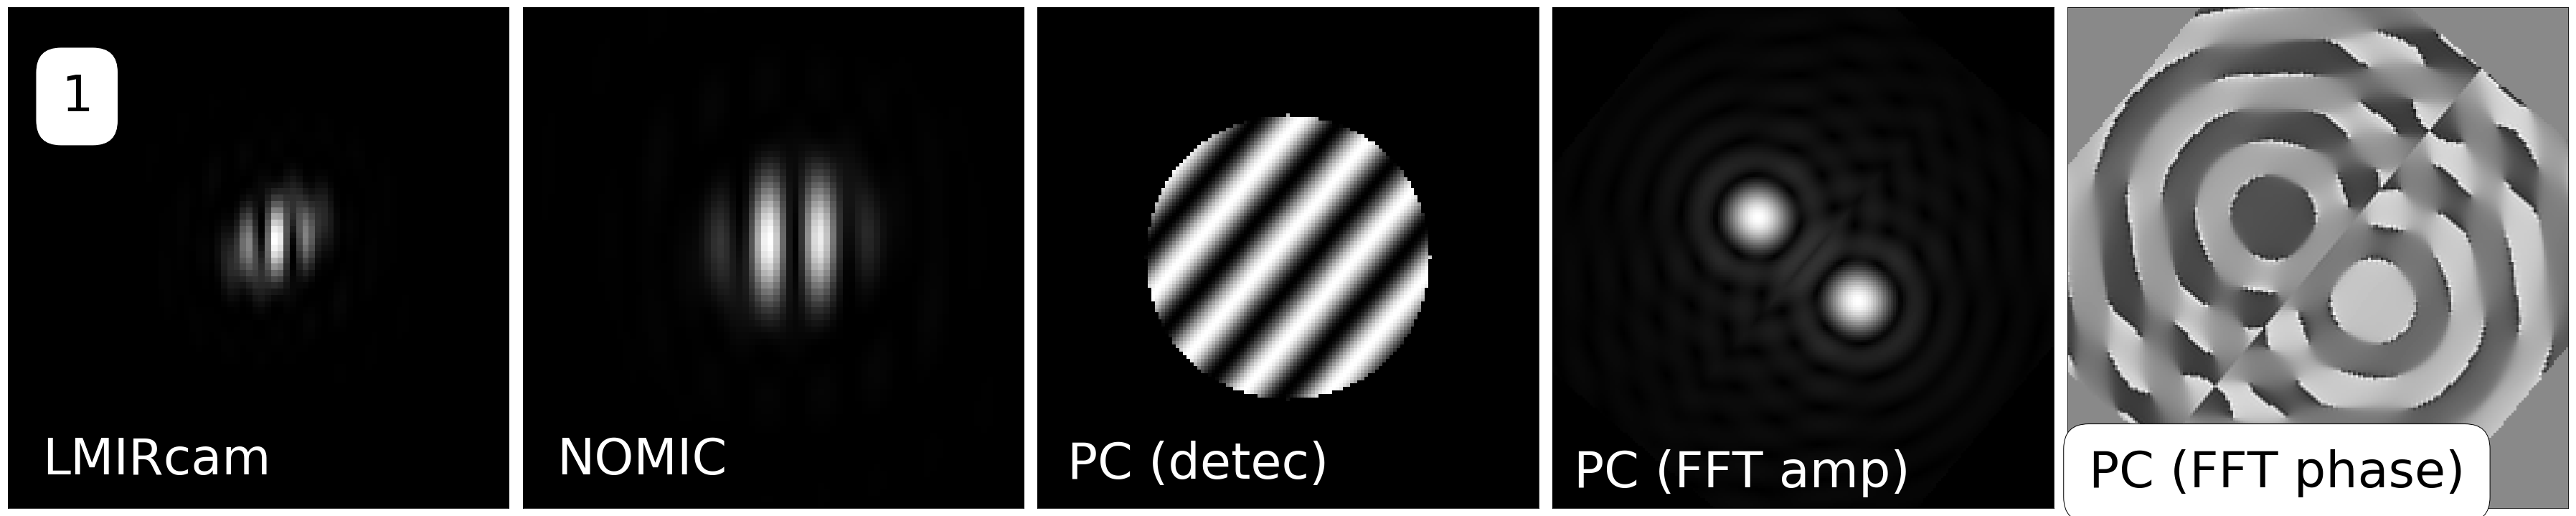

In [107]:
# read in 

print("Fig. 1")
print("------------------")

lmir_image, header = fits.getdata("images/pc_cartoon_lmir_01.fits",0,header=True) 
nomic_image, header = fits.getdata("images/pc_cartoon_nomic_01.fits",0,header=True) 
pc_image, header = fits.getdata("images/phase_detec_01_pre02.fits",0,header=True) 
pc_image_amp, header = fits.getdata("images/phase_amp_sim_01_pre02.fits",0,header=True) 
pc_image_phase, header = fits.getdata("images/phase_arg_pre01.fits",0,header=True) 


print(np.shape(image))

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(1, 5, figsize=(50,10))
N = 40

axes[0].imshow(lmir_image[0,1024-N:1024+N,1024-N:1024+N], origin="lower", cmap="gray")
axes[0].annotate("LMIRcam", xy=(0,0), xytext=(5,5), color="white", fontsize=70)
axes[0].annotate("1", xy=(0,50), xytext=(8,63), color="k", fontsize=70, 
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

axes[1].imshow(nomic_image[0,1024-N:1024+N,1024-N:1024+N], origin="lower", cmap="gray")
axes[1].annotate("NOMIC", xy=(0,0), xytext=(5,5), color="white", fontsize=70)

pc_image[pc_image == 2] = 0
axes[2].imshow(pc_image, origin="lower", cmap="gray")
axes[2].annotate("PC (detec)", xy=(0,0), xytext=(8,8), color="white", fontsize=70)

axes[3].imshow(rot(pc_image_amp[550-100:550+100,565-150:565+50], 40, 
                   axis=[100,100], order=3, pivot=False), origin="lower", cmap="gray")
axes[3].annotate("PC (FFT amp)", xy=(0,0), xytext=(8,8), color="white", fontsize=70)

axes[4].imshow(rot(pc_image_phase[550-100:550+100,565-150:565+50], 40, 
                   axis=[100,100], order=3, pivot=False), origin="lower", cmap="gray")
axes[4].annotate("PC (FFT phase)", xy=(0,0), xytext=(8,8), color="k", fontsize=70, 
                 bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=1))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()

## 